#  Case Study 1.1.1: Genetic Codes

## Gameplan:
- Load Data
- Calculate frequencies of words of length 1-4
- Run PCA on each of the calculated frequencies
- K-Means

In [1]:
import csv
from src.CalcFreq import *
from src.PCAFreq import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('data/ccrescentus.csv') as file:
    reader = csv.reader(file)
    data = list(reader)

In [3]:
genome = ""
for row in data:
    genome += row[0]

In [4]:
len(genome)

305400

In [5]:
freqTables = {}
for i in range(1,5):
    freqTables[i] = CalcFreq(genome,i,300)
    

Cutting into fragments of length 300 and word length 1.
Cutting into fragments of length 300 and word length 2.
Cutting into fragments of length 300 and word length 3.
Cutting into fragments of length 300 and word length 4.


In [6]:
options = ["Normalize","Standardize","No Preprocessing"]

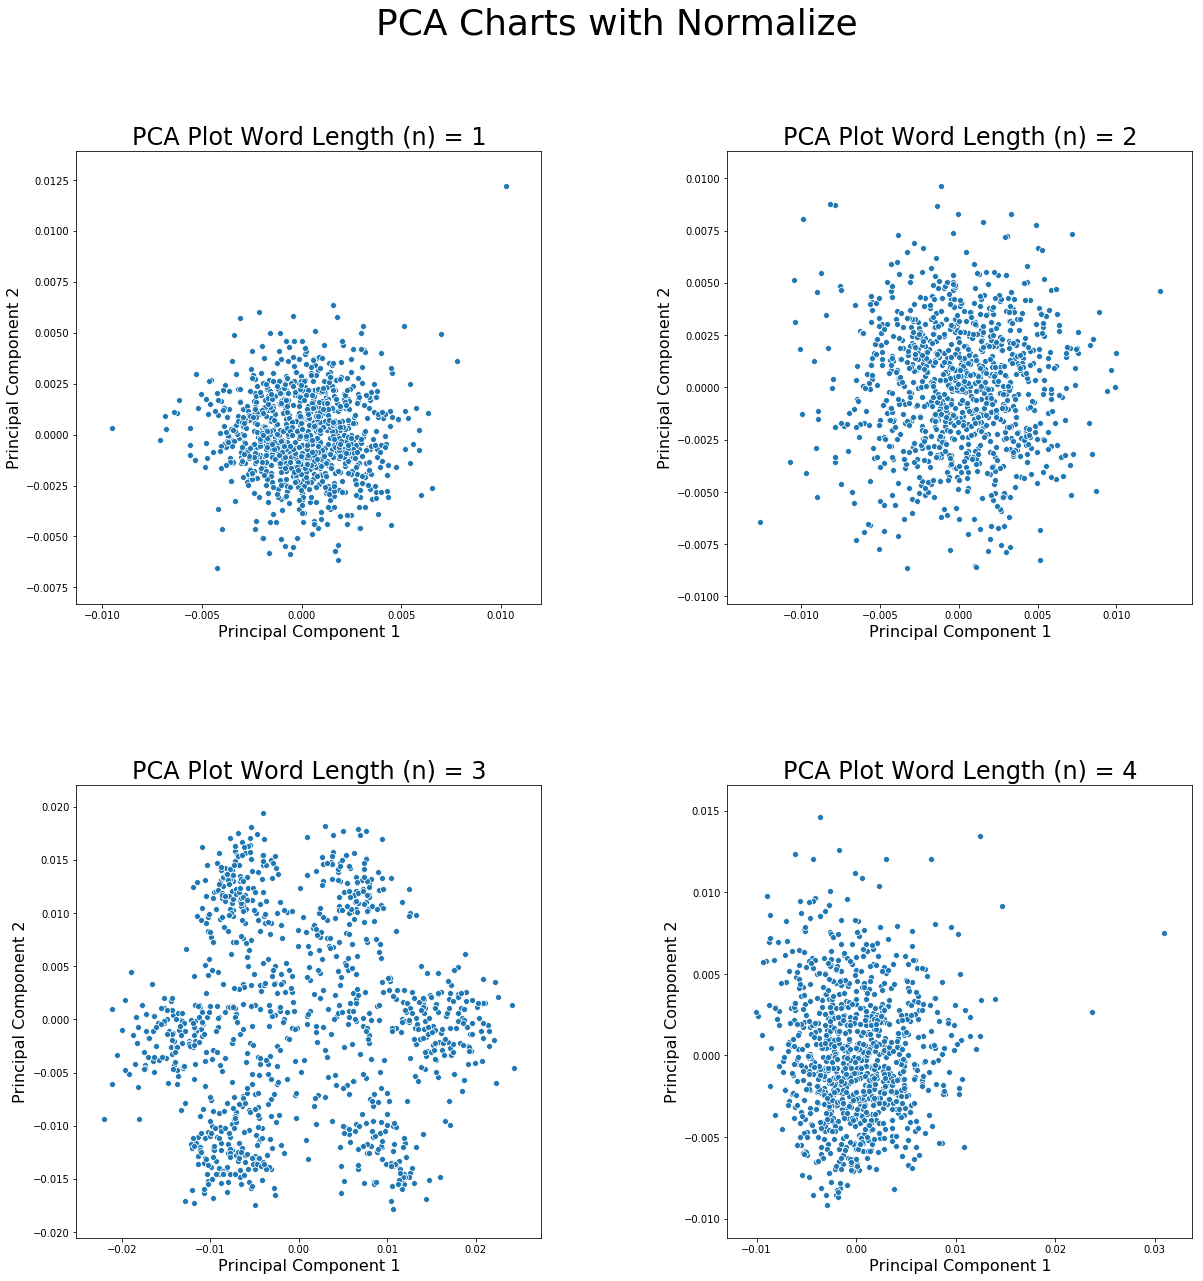

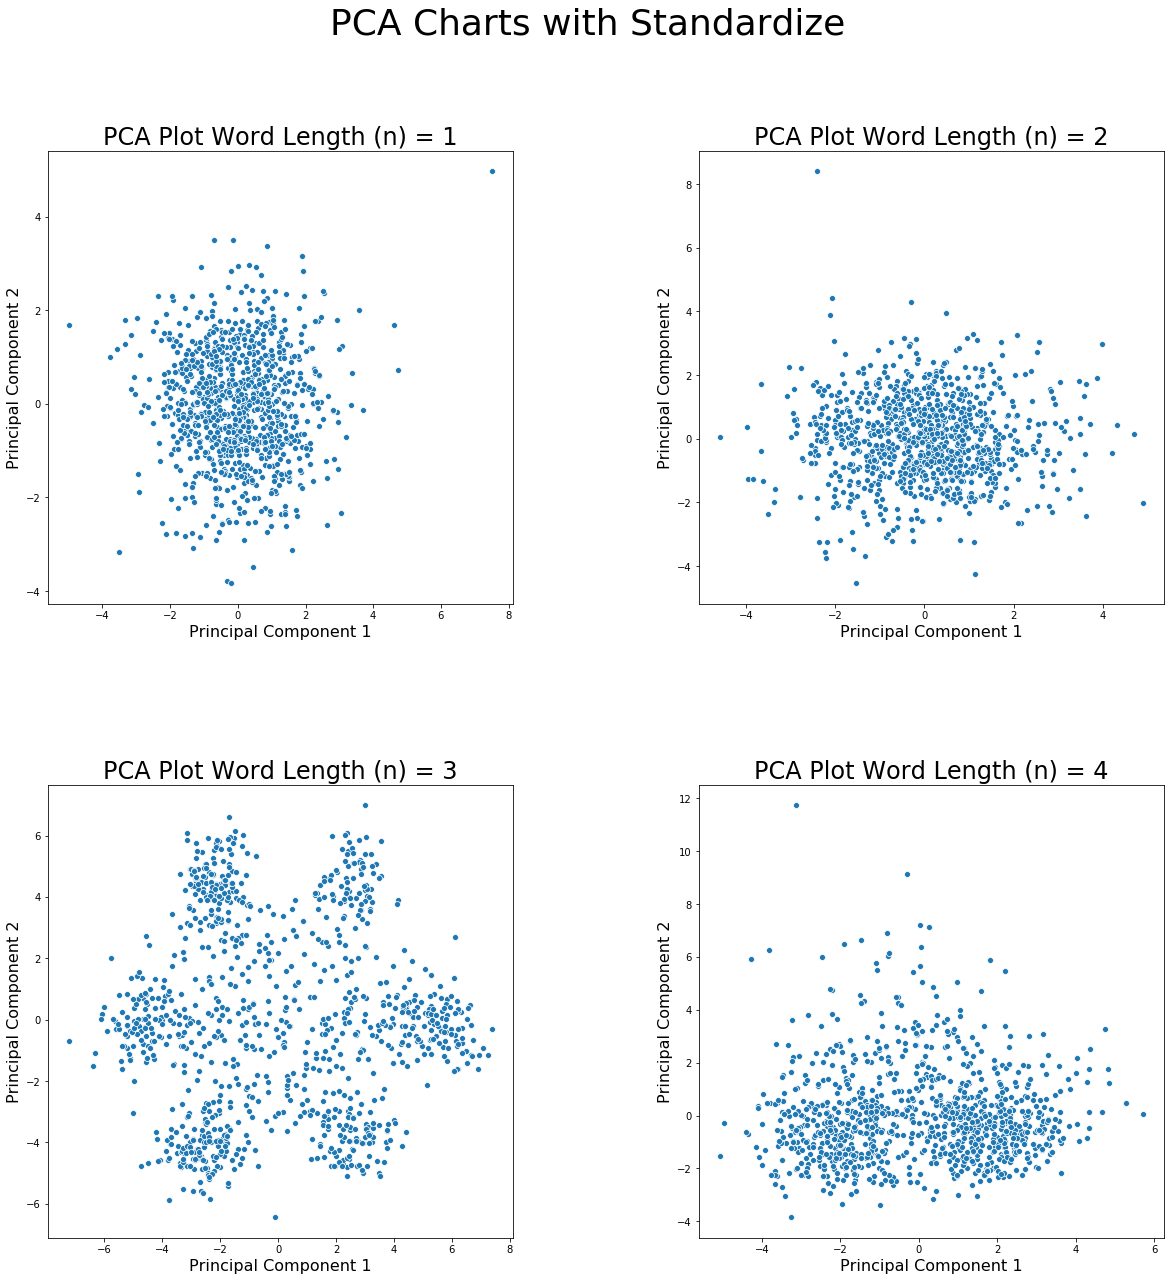

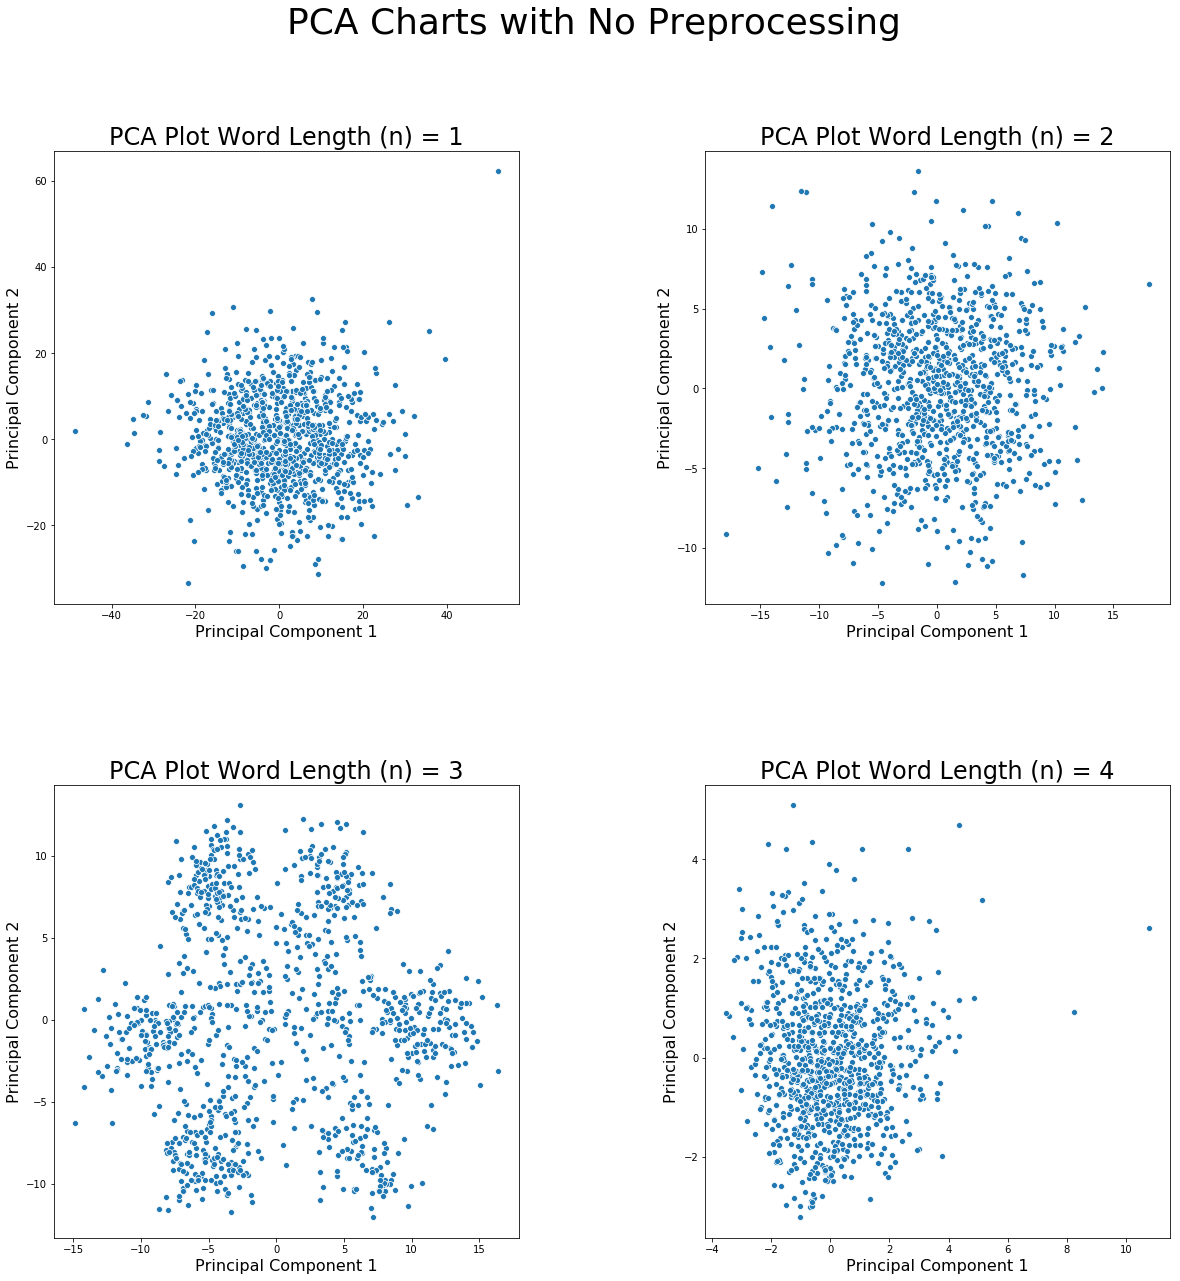

In [7]:
for each in options:
    pca_data = {}
    for table in freqTables:
        pca_data[table] = PCAFreq(freqTables[table],each)

    fig = plt.figure(figsize=(20,20))
    fig.suptitle("PCA Charts with {}".format(each),fontsize = 36,)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for i in range(1,5):
        ax = fig.add_subplot(2, 2, i)
        sns.scatterplot(pca_data[i][:,0],pca_data[i][:,1])
        ax.set_title('PCA Plot Word Length (n) = {}'.format(i),fontsize=24)
        ax.set_xlabel('Principal Component 1',fontsize=16)
        ax.set_ylabel('Principal Component 2',fontsize=16)
    

In [8]:
from sklearn.cluster import KMeans

In [9]:
X = pca_data[3]
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)

In [10]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [11]:
kmeans.labels_

array([5, 5, 5, ..., 6, 3, 3], dtype=int32)

In [27]:
x = pca_data[3][:,0]
y = pca_data[3][:,1]
c = kmeans.predict(X)
cen = kmeans.cluster_centers_

In [29]:
cen_c = kmeans.predict(cen)

In [21]:
LABEL_COLOR_MAP = {0 : 'b',
                   1 : 'g',
                   2 : 'r',
                   3 : 'c',
                   4 : 'm',
                   5 : 'y',
                   6 : 'k',
                  }
label_color = [LABEL_COLOR_MAP[l] for l in c]

Text(0, 0.5, 'Principal Component 2')

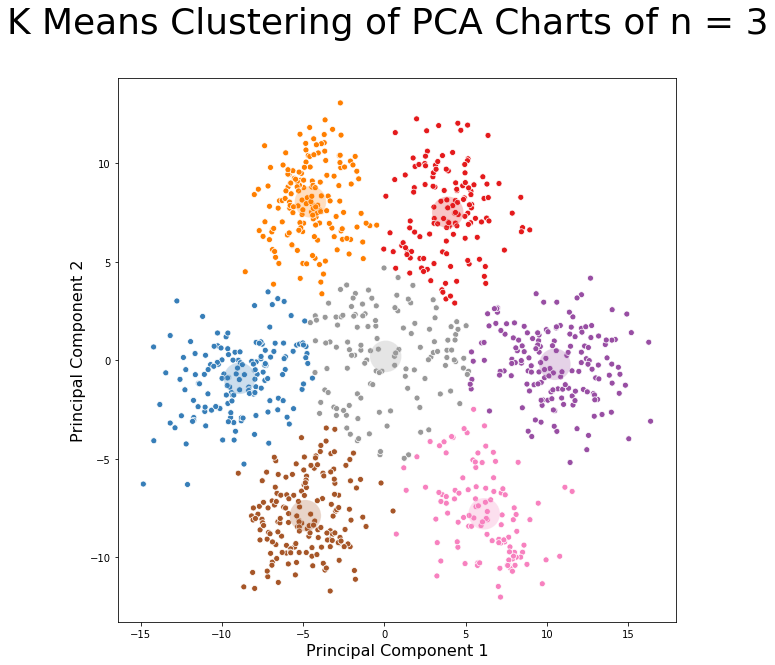

In [57]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("K Means Clustering of PCA Charts of n = 3",fontsize = 36,)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plot = sns.scatterplot(x, y, hue=kmeans.predict(X),palette="Set1")
plot = sns.scatterplot(cen[:,0],cen[:,1],hue=cen_c,palette="Set1",s=1000,alpha=.25)
plot.legend_.remove()
plt.xlabel('Principal Component 1',fontsize=16)
plt.ylabel('Principal Component 2',fontsize=16)